## 1. Import libraries  
We import OpenCV for image processing, NumPy for numerical operations, and key Keras modules for building and training our CNN.


In [ ]:
# OpenCV for image loading and transformations
import cv2
# NumPy for array manipulations
import numpy as np
import cv2
import numpy as np
from tensorflow.keras.models import load_model
# Keras model utilities
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Layers for building the CNN
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
# Matplotlib for plotting

from tensorflow.keras.models       import Sequential
from tensorflow.keras.layers       import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks    import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt


## 2. Configuration and Data Generators  
Define hyperparameters, set up directories, and configure `ImageDataGenerator` to load and augment ASL alphabet images for training and validation.


In [ ]:
# Batch size and target image dimensions
batch_size = 64
image_size = 64
target_dims = (image_size, image_size, 3)
num_classes = 29

train_dir = 'D:/MDG/Nebula/dataset/asl_alphabet_train/asl_alphabet_train/'
validation_split = 0.2

In [4]:
validation_split = 0.2

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    validation_split=validation_split
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
)

print("Classes found:", train_generator.class_indices)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Classes found: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


## 3. Visualize Training Samples  
Display a grid of augmented training images with their corresponding labels to verify data preprocessing.


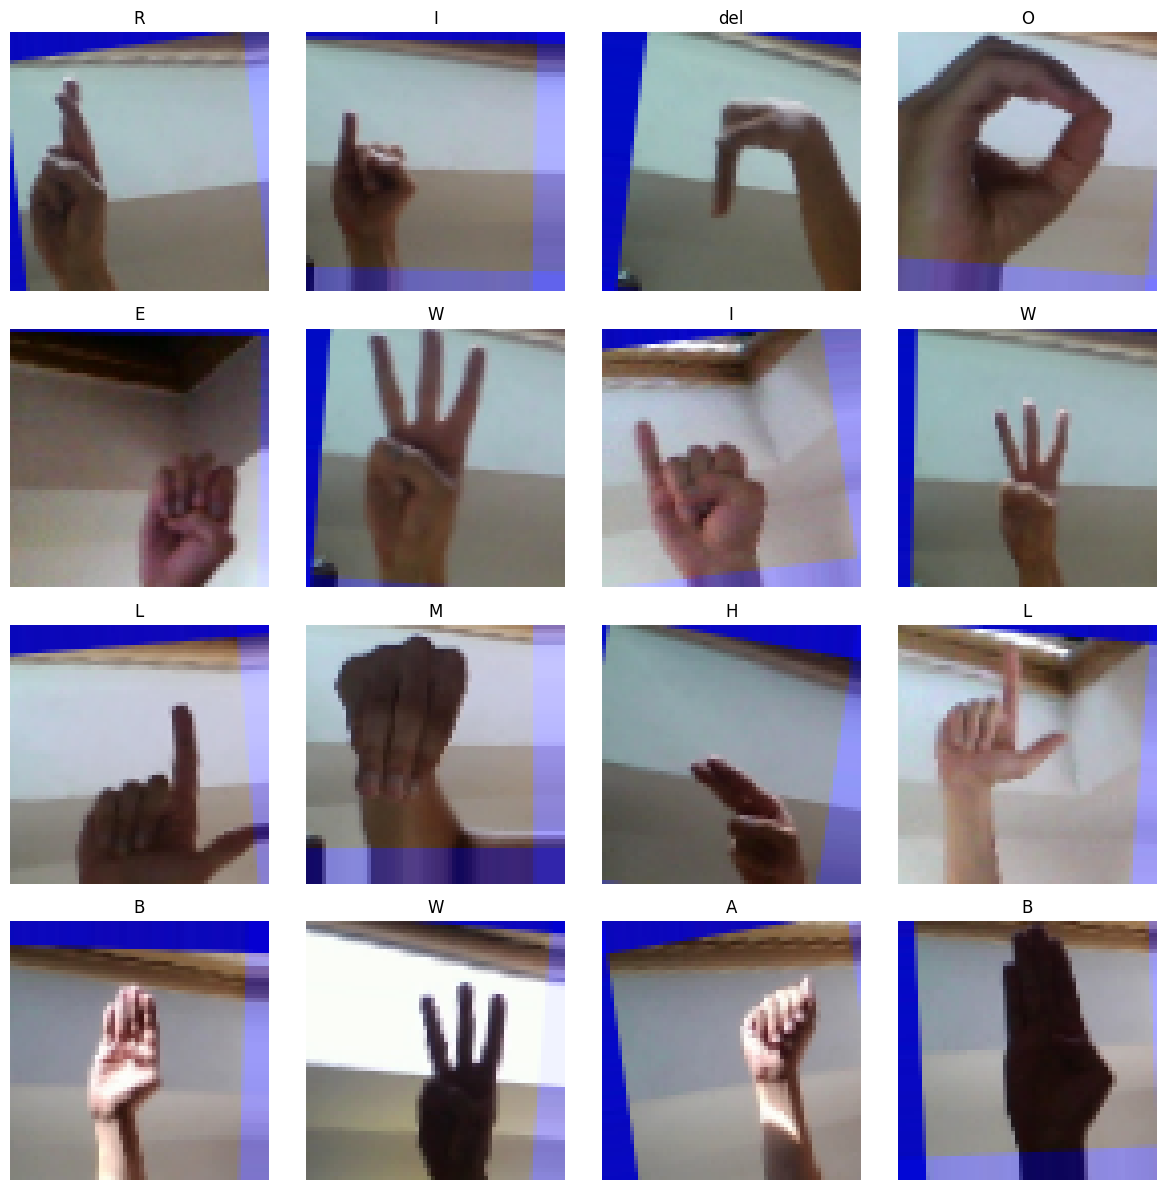

In [5]:
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)

inv_class = {v:k for k,v in train_generator.class_indices.items()}

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i, ax in enumerate(axes.flatten()):
    img = x_batch[i]
    label_idx = y_batch[i].argmax()
    ax.imshow(img)
    ax.set_title(inv_class[label_idx])
    ax.axis('off')

plt.tight_layout()
plt.show()


## 4. Define the Convolutional Neural Network  
Construct a Sequential CNN model with two convolutional blocks, flattening, and dense output for classification.


In [6]:
model = Sequential()

# First conv block: 32 filters, 5×5 kernel
model.add(Conv2D(32, (5, 5), input_shape=target_dims))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

# Second conv block: 64 filters, 3×3 kernel
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

# Third conv block: 64 filters, 3×3 kernel
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

d:\MDG\Nebula\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,637 (1.36 MB)

 Trainable params: 356,637 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile with categorical crossentropy for multi-class classification
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# stop training when val_loss stops improving, and roll back to best weights
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
# save only the model that achieves the lowest val_loss
checkpoint = ModelCheckpoint(
    'asl_best_model.h5',
    monitor='val_loss',
    save_best_only=True
)

my_callbacks = [early_stop, checkpoint]


## 5. Train the Model  
Fit the CNN on the training data, validate on the held-out set, and plot accuracy/loss curves.


In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=my_callbacks
)


Epoch 1/5


d:\MDG\Nebula\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4229 - loss: 1.9811

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 164s 150ms/step - accuracy: 0.4231 - loss: 1.9804 - val_accuracy: 0.5953 - val_loss: 1.3448
Epoch 2/5
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8774 - loss: 0.3795

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 173s 159ms/step - accuracy: 0.8774 - loss: 0.3795 - val_accuracy: 0.6785 - val_loss: 1.2358
Epoch 3/5
 627/1088 ━━━━━━━━━━━━━━━━━━━━ 1:03 138ms/step - accuracy: 0.9303 - loss: 0.2076

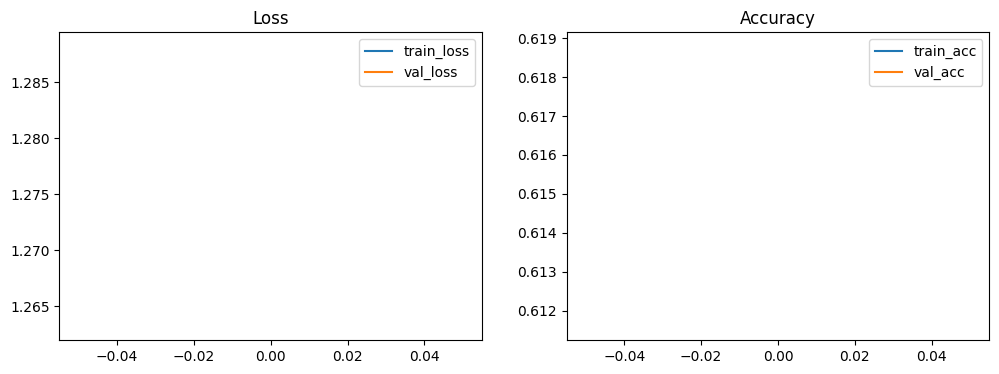

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation loss: {val_loss:.4f}, accuracy: {val_acc:.4f}')

272/272 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.6954 - loss: 0.9748
Validation loss: 1.2530, accuracy: 0.6229


## 6. Save, Load, and Test the Model  
Persist the trained model, reload it, and define a helper function to predict on new images.


In [ ]:

model.save('asl_5_epochs.h5')
print('Model saved as asl.h5')


Model saved as asl.h5


In [26]:


model = load_model('asl_best_model.h5')


## Webcam testing

In [ ]:

labels = sorted([
    'A','B','C','D','E','F','G','H','I','J','K','L','M',
    'N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
    'del','nothing','space'
])


In [ ]:
cap = cv2.VideoCapture(0)   
if not cap.isOpened():
    raise RuntimeError("Could not open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    img = cv2.resize(frame, (64,64))
    img = img.astype('float32') / 255.0
    x   = np.expand_dims(img, axis=0) 

    preds = model.predict(x, verbose=0)
    idx   = preds.argmax(axis=1)[0]
    prob  = preds[0,idx]
    text  = f"{labels[idx]} ({prob*100:.1f}%)"

    cv2.putText(frame, text, (10,30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    cv2.imshow('ASL Webcam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

: 